<a href="https://colab.research.google.com/github/Jayashrimusale/Heliverse/blob/main/Ass_Heliverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv', encoding='latin1')

In [ ]:
df.head()

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
Gender = {'Female': 0, 'Male': 1}
df['Gender'] = df['Gender'].map(Gender)

In [ ]:
df.dropna(inplace=True)

In [ ]:
Attrition_mapping = {'No': 0, 'Yes': 1}
df['Attrition'] = df['Attrition'].map(Attrition_mapping)
X = df.drop(columns=['Attrition'])
y = df['Attrition']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)  # You can adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.10609604 0.06988187 0.05305671 0.04307287 0.03959115 0.03854312
 0.03601038 0.03527635 0.03129683 0.03016448]


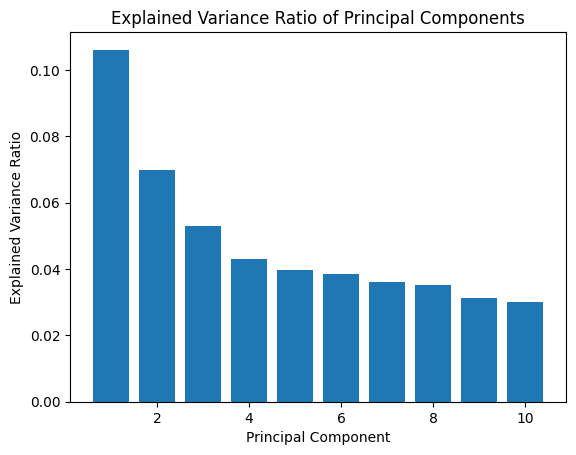

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier
from sklearn.decomposition import PCA
import xgboost as xgb


In [ ]:
base_classifiers = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('MLP', MLPClassifier()),
    ('SVM', SVC(probability=True))
]

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [ ]:
for clf_name, clf in base_classifiers:
    # Train classifier
    clf.fit(X_train_pca, y_train)

    # Predictions
    y_pred = clf.predict(X_test_pca)

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print results
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\n")

Classifier: LR
Accuracy: 0.8673469387755102
Precision: 0.8359220295277485
Recall: 0.8673469387755102
F1 Score: 0.8300462787345421


Classifier: KNN
Accuracy: 0.8622448979591837
Precision: 0.8327140638864242
Recall: 0.8622448979591837
F1 Score: 0.8386803402991181


Classifier: DT
Accuracy: 0.8095238095238095
Precision: 0.8075366726233405
Recall: 0.8095238095238095
F1 Score: 0.8085208098987627


Classifier: MLP
Accuracy: 0.8571428571428571
Precision: 0.8223236223236223
Recall: 0.8571428571428571
F1 Score: 0.8302960791810033


Classifier: SVM
Accuracy: 0.8673469387755102
Precision: 0.8423918790314053
Recall: 0.8673469387755102
F1 Score: 0.81868305333183




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
base_accuracy = {}
for clf_name, clf in base_classifiers:
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    base_accuracy[clf_name] = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


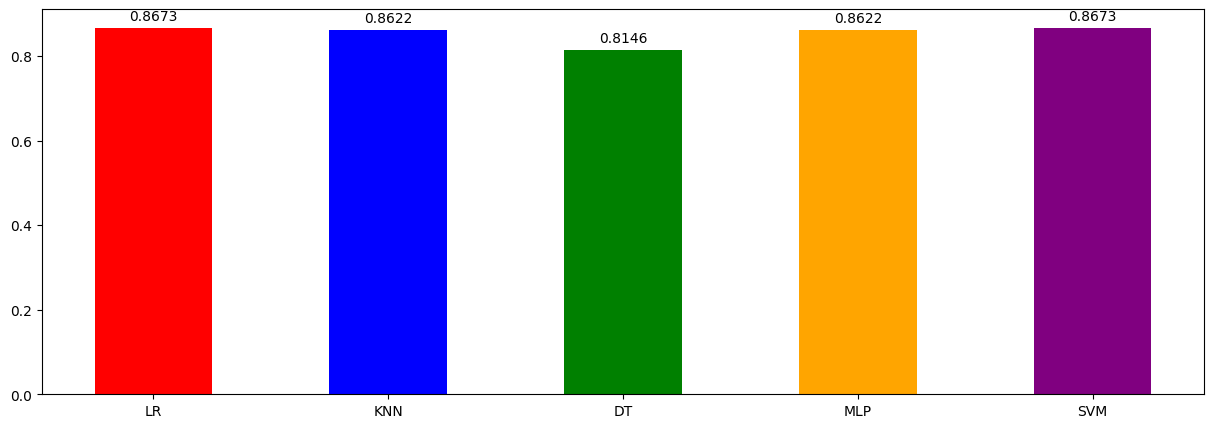

In [ ]:
plt.figure(figsize=(15, 5))

# Bar graph for base classifier
base_colors = ['red', 'blue', 'green', 'orange', 'purple']
base_x = np.arange(len(base_accuracy))
plt.bar(base_x, base_accuracy.values(), color=base_colors,width=0.5)
plt.xticks(base_x, base_accuracy.keys())
for i, acc in enumerate(base_accuracy.values()):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', va='bottom')

In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier


In [ ]:

from catboost import CatBoostClassifier

classifiers = [
    ('Bagging (DT)', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15), n_estimators=150, random_state=42)),
    ('AdaBoost (DT)', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15), n_estimators=150, random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)),
    ('Stacking', StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())),
    ('Voting', VotingClassifier(estimators=base_classifiers, voting='soft')),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=150, learning_rate=1.0, max_depth=15, random_state=42)),
    ('Extra Trees', ExtraTreesClassifier(n_estimators=150, max_depth=15, random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))  # Set verbose=0 to suppress CatBoost output
]

In [ ]:
accuracy_scores1 = []
precision_scores1 = []
recall_scores1 = []
f1_scores1 = []

In [ ]:
for clf_name, clf in classifiers:
    # Train classifier
    clf.fit(X_train_pca, y_train)

    # Predictions
    y_pred = clf.predict(X_test_pca)

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append metrics to lists
    accuracy_scores1.append(accuracy)
    precision_scores1.append(precision)
    recall_scores1.append(recall)
    f1_scores1.append(f1)

    # Print results
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classifier: Bagging (DT)
Accuracy: 0.8741496598639455
Precision: 0.8509635795350081
Recall: 0.8741496598639455
F1 Score: 0.8504989268975507




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classifier: AdaBoost (DT)
Accuracy: 0.8503401360544217
Precision: 0.812879654574307
Recall: 0.8503401360544217
F1 Score: 0.8239135341840055


Classifier: Random Forest
Accuracy: 0.8690476190476191
Precision: 0.8400543802487266
Recall: 0.8690476190476191
F1 Score: 0.835142115188985




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Classifier: Stacking
Accuracy: 0.8656462585034014
Precision: 0.832903640179476
Recall: 0.8656462585034014
F1 Score: 0.8327540540025535




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: Voting
Accuracy: 0.8656462585034014
Precision: 0.8317476286289164
Recall: 0.8656462585034014
F1 Score: 0.8288859858933214


Classifier: Gradient Boosting
Accuracy: 0.826530612244898
Precision: 0.8034462669992171
Recall: 0.826530612244898
F1 Score: 0.8134517441055337


Classifier: Extra Trees
Accuracy: 0.8622448979591837
Precision: 0.8233418367346939
Recall: 0.8622448979591837
F1 Score: 0.8245539855361901


Classifier: CatBoost
Accuracy: 0.8707482993197279
Precision: 0.8438473196127239
Recall: 0.8707482993197279
F1 Score: 0.8382035075798403




In [ ]:

clf_accuracy = {}
for clf_name, clf in classifiers:
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    clf_accuracy[clf_name] = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) r

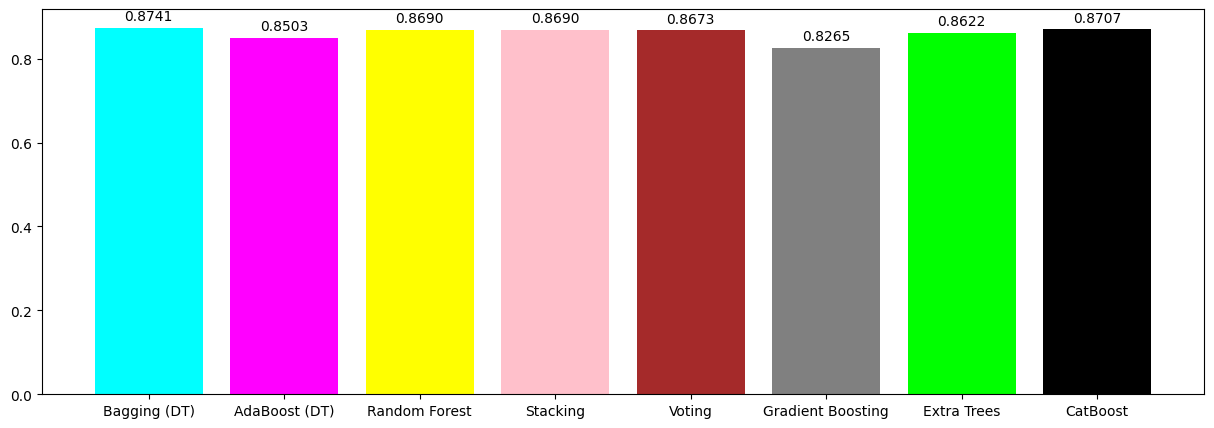

In [ ]:
plt.figure(figsize=(15, 5))

clf_colors = ['cyan', 'magenta', 'yellow', 'pink', 'brown', 'gray', 'lime', 'black']
clf_x = np.arange(len(classifiers)) + len(base_accuracy) + 1
plt.bar(clf_x, clf_accuracy.values(), color=clf_colors)
plt.xticks(clf_x, clf_accuracy.keys())
for i, acc in enumerate(clf_accuracy.values()):
    plt.text(i + len(base_accuracy) + 1, acc + 0.01, f"{acc:.4f}", ha='center', va='bottom')

After comparing, the best model is: Bagging (DT)


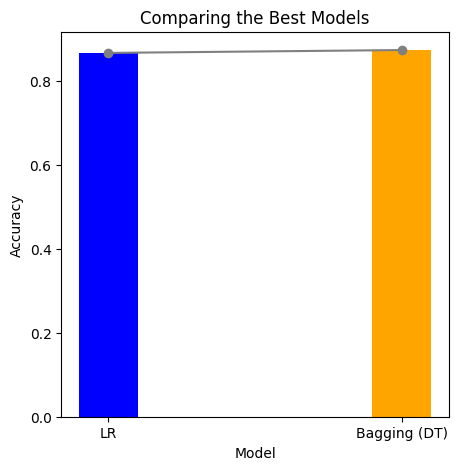

In [ ]:

plt.figure(figsize=(5, 5))

best_base = max(base_accuracy, key=base_accuracy.get)
best_clf = max(clf_accuracy, key=clf_accuracy.get)

bar_width = 0.2

# Plot the bars with the specified width
plt.bar([best_base, best_clf], [base_accuracy[best_base], clf_accuracy[best_clf]], color=['blue', 'orange'], width=bar_width)

# Connect the bars with a line
plt.plot([best_base, best_clf], [base_accuracy[best_base], clf_accuracy[best_clf]], marker='o', linestyle='-', color='gray')

# Display the model with the highest accuracy below each bar
#plt.text(best_base, min(base_accuracy[best_base], clf_accuracy[best_clf]) - 0.02, f"{best_base}: {base_accuracy[best_base]:.4f}", ha='center', va='bottom')
#plt.text(best_clf, min(base_accuracy[best_base], clf_accuracy[best_clf]) - 0.02, f"{best_clf}: {clf_accuracy[best_clf]:.4f}", ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparing the Best Models')
# plt.show()  # Commenting out plt.show()

# Add a line of text below the graph
print(f"After comparing, the best model is: {best_base if base_accuracy[best_base] > clf_accuracy[best_clf] else best_clf}")

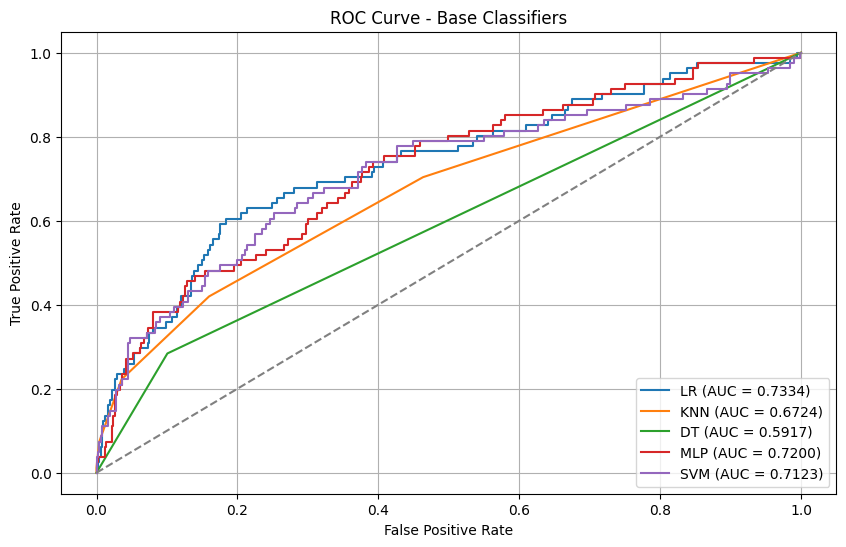

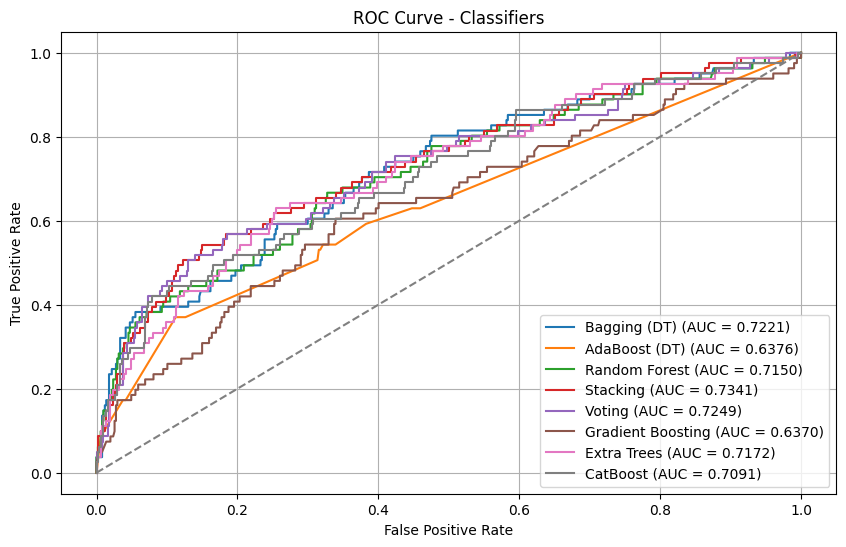

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for base classifiers
base_classifier_roc_curves = {}
base_classifier_auc_scores = {}

for clf_name, clf in base_classifiers:
    y_pred_proba = clf.predict_proba(X_test_pca)[:, 1]  # Probability estimates of the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    base_classifier_roc_curves[clf_name] = (fpr, tpr)
    base_classifier_auc_scores[clf_name] = roc_auc_score(y_test, y_pred_proba)

# Calculate ROC curve and AUC for classifiers
classifier_roc_curves = {}
classifier_auc_scores = {}

for clf_name, clf in classifiers:
    y_pred_proba = clf.predict_proba(X_test_pca)[:, 1]  # Probability estimates of the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    classifier_roc_curves[clf_name] = (fpr, tpr)
    classifier_auc_scores[clf_name] = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curves for base classifiers
plt.figure(figsize=(10, 6))

for clf_name, (fpr, tpr) in base_classifier_roc_curves.items():
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {base_classifier_auc_scores[clf_name]:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Base Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for classifiers
plt.figure(figsize=(10, 6))

for clf_name, (fpr, tpr) in classifier_roc_curves.items():
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {classifier_auc_scores[clf_name]:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
metrics_df = pd.DataFrame({
    'Model': ['LR', 'KNN', 'DT', 'MLP', 'SVM', 'Bagging (DT)', 'AdaBoost (DT)', 'Random Forest', 'Stacking', 'Voting', 'Gradient Boosting', 'Extra Trees', 'CatBoost'],
    'Accuracy': accuracy_scores + accuracy_scores1,
    'Precision': precision_scores + precision_scores1,
    'Recall': recall_scores + recall_scores1,
    'F1 Score': f1_scores + f1_scores1
})

# Set the 'Model' column as the index
metrics_df.set_index('Model', inplace=True)

# Display the DataFrame
print("Metrics for Base Learners and Ensemble Learners:")
print(metrics_df)

Metrics for Base Learners and Ensemble Learners:
                   Accuracy  Precision    Recall  F1 Score
Model                                                     
LR                 0.867347   0.835922  0.867347  0.830046
KNN                0.862245   0.832714  0.862245  0.838680
DT                 0.809524   0.807537  0.809524  0.808521
MLP                0.857143   0.822324  0.857143  0.830296
SVM                0.867347   0.842392  0.867347  0.818683
Bagging (DT)       0.874150   0.850964  0.874150  0.850499
AdaBoost (DT)      0.850340   0.812880  0.850340  0.823914
Random Forest      0.869048   0.840054  0.869048  0.835142
Stacking           0.865646   0.832904  0.865646  0.832754
Voting             0.865646   0.831748  0.865646  0.828886
Gradient Boosting  0.826531   0.803446  0.826531  0.813452
Extra Trees        0.862245   0.823342  0.862245  0.824554
CatBoost           0.870748   0.843847  0.870748  0.838204


<ipython-input-37-235db43276f3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_accuracy.index, y='Accuracy', data=df_accuracy, palette='viridis')


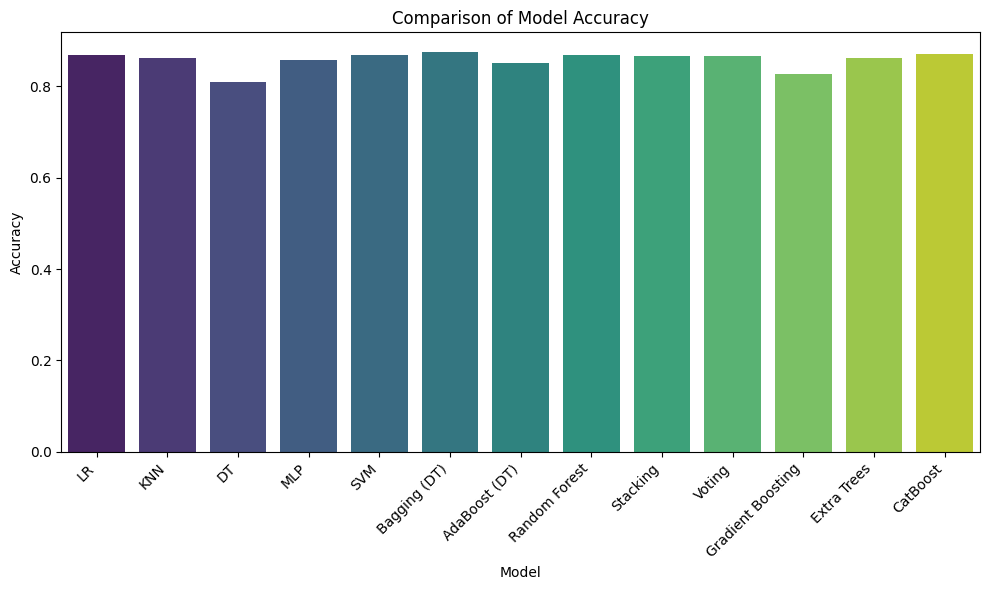

The best model based on accuracy is: Bagging (DT)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
models = ['LR', 'KNN', 'DT', 'MLP', 'SVM', 'Bagging (DT)', 'AdaBoost (DT)', 'Random Forest', 'Stacking', 'Voting', 'Gradient Boosting', 'Extra Trees', 'CatBoost']
accuracy = [0.867347, 0.862245, 0.809524, 0.857143, 0.867347, 0.874150, 0.850340, 0.869048, 0.865646, 0.865646, 0.826531, 0.862245, 0.870748]

# Create DataFrame
import pandas as pd
data = {'Model': models, 'Accuracy': accuracy}
df_accuracy = pd.DataFrame(data)
df_accuracy.set_index('Model', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=df_accuracy.index, y='Accuracy', data=df_accuracy, palette='viridis')
plt.title('Comparison of Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Find the best model based on accuracy
best_model = df_accuracy.idxmax(axis=0)['Accuracy']
print("The best model based on accuracy is:", best_model)


In [ ]:

from sklearn.model_selection import cross_val_score

# Cross-validation for base classifiers
for clf_name, clf in base_classifiers:
    cv_scores = cross_val_score(clf, X_train_pca, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    print(f"Mean cross-validation accuracy for {clf_name}: {np.mean(cv_scores)}")
    print("\n")

# Cross-validation for ensemble classifiers
for clf_name, clf in classifiers:
    cv_scores = cross_val_score(clf, X_train_pca, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    print(f"Mean cross-validation accuracy for {clf_name}: {np.mean(cv_scores)}")
    print("\n")

Cross-validation scores for LR: [0.83615819 0.83050847 0.83522727 0.84659091 0.81818182]
Mean cross-validation accuracy for LR: 0.8333333333333334


Cross-validation scores for KNN: [0.81920904 0.8079096  0.83522727 0.82954545 0.82954545]
Mean cross-validation accuracy for KNN: 0.8242873651771957


Cross-validation scores for DT: [0.7740113  0.75141243 0.80113636 0.78977273 0.77272727]
Mean cross-validation accuracy for DT: 0.7778120184899846




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validation scores for MLP: [0.83615819 0.8079096  0.83522727 0.82954545 0.83522727]
Mean cross-validation accuracy for MLP: 0.8288135593220339


Cross-validation scores for SVM: [0.84180791 0.81920904 0.84090909 0.84090909 0.83522727]
Mean cross-validation accuracy for SVM: 0.8356124807395993




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Cross-validation scores for Bagging (DT): [0.82485876 0.82485876 0.82386364 0.83522727 0.81818182]
Mean cross-validation accuracy for Bagging (DT): 0.8253980482794041


Cross-validation scores for AdaBoost (DT): [0.80225989 0.81920904 0.83522727 0.83522727 0.77840909]
Mean cross-validation accuracy for AdaBoost (DT): 0.8140665125834617




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Cross-validation scores for Random Forest: [0.84745763 0.84745763 0.84090909 0.85795455 0.82954545]
Mean cross-validation accuracy for Random Forest: 0.8446648690292757




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validation scores for Stacking: [0.83615819 0.82485876 0.84090909 0.85227273 0.84090909]
Mean cross-validation accuracy for Stacking: 0.8390215716486903




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validation scores for Voting: [0.83615819 0.81920904 0.84659091 0.85795455 0.86931818]
Mean cross-validation accuracy for Voting: 0.8458461736004109


Cross-validation scores for Gradient Boosting: [0.78531073 0.76836158 0.79545455 0.78977273 0.77840909]
Mean cross-validation accuracy for Gradient Boosting: 0.7834617360041088


Cross-validation scores for Extra Trees: [0.83615819 0.81355932 0.82954545 0.82954545 0.82954545]
Mean cross-validation accuracy for Extra Trees: 0.8276707755521315


Cross-validation scores for CatBoost: [0.84180791 0.83050847 0.83522727 0.82386364 0.85227273]
Mean cross-validation accuracy for CatBoost: 0.8367360041088855


